In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [ ]:
import pandas as pd

insurance=pd.read_csv('/content/drive/MyDrive/Claimants_Data.csv')

In [ ]:
insurance

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100151,100152,0,1.0,1.0,1.0,88,4998.43,Severe,10673.92,1,8921.29,Comprehensive,Minor Offenses
100152,100153,0,1.0,1.0,1.0,89,9925.55,Moderate,6345.22,1,18418.60,Third-Party,Clean
100153,100154,1,0.0,1.0,1.0,4,8314.99,Severe,9233.50,1,10453.20,Third-Party,Major Offenses
100154,100155,0,0.0,0.0,0.0,50,3302.68,Moderate,1489.38,1,1825.65,Third-Party,Minor Offenses


In [ ]:
insurance.isnull()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100151,False,False,False,False,False,False,False,False,False,False,False,False,False
100152,False,False,False,False,False,False,False,False,False,False,False,False,False
100153,False,False,False,False,False,False,False,False,False,False,False,False,False
100154,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
insurance.isnull().sum()

,0
CASENUM,0
ATTORNEY,0
CLMSEX,0
CLMINSUR,0
SEATBELT,0
CLMAGE,0
LOSS,0
Accident_Severity,0
Claim_Amount_Requested,0
Claim_Approval_Status,0


In [ ]:
insurance.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,2,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,3,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,4,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,5,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses


In [ ]:
insurance.drop(['CASENUM'],axis=1,inplace=True)

In [ ]:
insurance

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
0,1,1.0,1.0,0.0,0,8502.60,Moderate,13062.60,1,10398.38,Comprehensive,Minor Offenses
1,0,1.0,0.0,1.0,19,2464.30,Moderate,4249.17,1,16550.01,Comprehensive,Clean
2,1,0.0,0.0,1.0,69,15647.05,Severe,7401.16,0,18019.31,Third-Party,Minor Offenses
3,1,0.0,0.0,1.0,34,9309.79,Moderate,1034.25,0,6826.58,Comprehensive,Minor Offenses
4,1,1.0,1.0,0.0,2,663.94,Severe,12654.29,0,18463.96,Third-Party,Minor Offenses
...,...,...,...,...,...,...,...,...,...,...,...,...
100151,0,1.0,1.0,1.0,88,4998.43,Severe,10673.92,1,8921.29,Comprehensive,Minor Offenses
100152,0,1.0,1.0,1.0,89,9925.55,Moderate,6345.22,1,18418.60,Third-Party,Clean
100153,1,0.0,1.0,1.0,4,8314.99,Severe,9233.50,1,10453.20,Third-Party,Major Offenses
100154,0,0.0,0.0,0.0,50,3302.68,Moderate,1489.38,1,1825.65,Third-Party,Minor Offenses


In [ ]:
Q2=np.percentile(insurance.CLMAGE,[25])[0]
Q3=np.percentile(insurance.CLMAGE,[50])[0]
Q4=np.percentile(insurance.CLMAGE,[75])[0]

IQR=Q3-Q2
IQR==Q4-Q3

np.True_

In [ ]:
lower_bound=Q2-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

outliers=[x for x in insurance.CLMAGE if x<lower_bound or x>upper_bound]

print(f"Q1 (25 percentile): {Q2}")
print(f"Q2 (50 percentile): {Q3}")
print(f"Q3 (75 percentile): {Q4}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

Q1 (25 percentile): 23.0
Q2 (50 percentile): 47.0
Q3 (75 percentile): 71.0
IQR: 24.0
Lower Bound: -13.0
Upper Bound: 83.0
Outliers: [85, 89, 85, 92, 85, 87, 94, 85, 85, 84, 84, 92, 88, 88, 93, 92, 94, 87, 93, 84, 92, 90, 88, 93, 85, 84, 84, 92, 85, 90, 92, 87, 84, 85, 92, 89, 94, 89, 89, 90, 86, 91, 85, 94, 91, 94, 85, 84, 89, 92, 87, 88, 92, 89, 86, 88, 86, 85, 85, 87, 89, 90, 89, 88, 90, 93, 94, 87, 89, 88, 94, 84, 93, 85, 93, 84, 94, 87, 93, 94, 90, 87, 87, 86, 93, 87, 84, 94, 94, 93, 84, 86, 94, 91, 88, 87, 90, 90, 85, 91, 87, 84, 89, 85, 92, 86, 84, 87, 85, 91, 94, 93, 94, 89, 89, 93, 86, 87, 86, 94, 94, 89, 84, 90, 85, 88, 91, 84, 93, 86, 86, 87, 89, 91, 84, 94, 89, 86, 88, 87, 86, 92, 93, 92, 85, 91, 88, 93, 88, 85, 84, 90, 92, 93, 92, 92, 93, 86, 93, 86, 94, 93, 84, 91, 87, 88, 86, 88, 84, 87, 85, 94, 92, 91, 94, 89, 87, 89, 93, 85, 91, 89, 84, 86, 90, 84, 86, 94, 92, 84, 86, 86, 92, 87, 84, 88, 86, 91, 84, 88, 88, 88, 85, 88, 91, 86, 88, 92, 87, 89, 84, 87, 89, 84, 94, 92, 85,

<ipython-input-12-3c644cf525c3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance.CLMAGE)


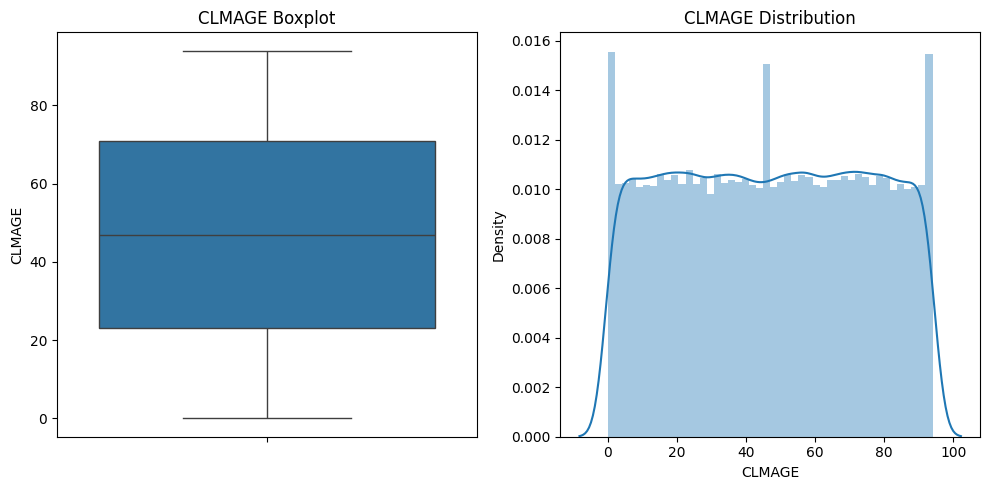

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(insurance.CLMAGE)
plt.title('CLMAGE Boxplot')


plt.subplot(1,2,2)
sns.distplot(insurance.CLMAGE)
plt.title('CLMAGE Distribution')

plt.tight_layout()
plt.show()

In [ ]:
insurance.drop_duplicates(['CLMAGE'],inplace=True)

Encoders

In [ ]:
label_encoder=LabelEncoder()
insurance['Policy_Type']=label_encoder.fit_transform(insurance['Policy_Type'])
print("Insurance data after label encoding:")
print(insurance)

Insurance data after label encoding:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS Accident_Severity  \
0           1     1.0       1.0       0.0       0   8502.60          Moderate   
1           0     1.0       0.0       1.0      19   2464.30          Moderate   
2           1     0.0       0.0       1.0      69  15647.05            Severe   
3           1     0.0       0.0       1.0      34   9309.79          Moderate   
4           1     1.0       1.0       0.0       2    663.94            Severe   
..        ...     ...       ...       ...     ...       ...               ...   
326         1     0.0       1.0       1.0      35   9517.24             Minor   
358         1     1.0       0.0       1.0      26  15048.62            Severe   
365         0     1.0       0.0       1.0      86   8754.95          Moderate   
367         1     0.0       0.0       0.0      91   8391.29          Moderate   
594         0     0.0       0.0       1.0      77  13974.98             

In [ ]:
label_encoder=LabelEncoder()
insurance['Accident_Severity']=label_encoder.fit_transform(insurance['Accident_Severity'])
print("Insurance data after label encoding:")
print(insurance)

Insurance data after label encoding:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0   8502.60   
1           0     1.0       0.0       1.0      19   2464.30   
2           1     0.0       0.0       1.0      69  15647.05   
3           1     0.0       0.0       1.0      34   9309.79   
4           1     1.0       1.0       0.0       2    663.94   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35   9517.24   
358         1     1.0       0.0       1.0      26  15048.62   
365         0     1.0       0.0       1.0      86   8754.95   
367         1     0.0       0.0       0.0      91   8391.29   
594         0     0.0       0.0       1.0      77  13974.98   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                13062.60                      1   
1                    1                 4249.17              

In [ ]:
label_encoder=LabelEncoder()
insurance['Driving_Record']=label_encoder.fit_transform(insurance['Driving_Record'])
print("Insurance data after label encoding:")
print(insurance)

Insurance data after label encoding:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0   8502.60   
1           0     1.0       0.0       1.0      19   2464.30   
2           1     0.0       0.0       1.0      69  15647.05   
3           1     0.0       0.0       1.0      34   9309.79   
4           1     1.0       1.0       0.0       2    663.94   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35   9517.24   
358         1     1.0       0.0       1.0      26  15048.62   
365         0     1.0       0.0       1.0      86   8754.95   
367         1     0.0       0.0       0.0      91   8391.29   
594         0     0.0       0.0       1.0      77  13974.98   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                13062.60                      1   
1                    1                 4249.17              

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(insurance[['Accident_Severity']])
print(encoded_data)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 95 stored elements and shape (95, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 2)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 2)	1.0
  (13, 1)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 1)	1.0
  (20, 2)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  :	:
  (70, 1)	1.0
  (71, 0)	1.0
  (72, 1)	1.0
  (73, 2)	1.0
  (74, 2)	1.0
  (75, 0)	1.0
  (76, 0)	1.0
  (77, 2)	1.0
  (78, 1)	1.0
  (79, 2)	1.0
  (80, 0)	1.0
  (81, 1)	1.0
  (82, 1)	1.0
  (83, 1)	1.0
  (84, 2)	1.0
  (85, 0)	1.0
  (86, 0)	1.0
  (87, 2)	1.0
  (88, 0)	1.0
  (89, 0)	1.0
  (90, 0)	1.0
  (91, 2)	1.0
  (92, 1)	1.0
  (93, 1)	1.0
  (94, 0)	1.0


Scaling

In [ ]:
scaling=MinMaxScaler()
insurance['LOSS']=scaling.fit_transform(insurance[['LOSS']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                13062.60                      1   
1                    1                 4249.17                     

In [ ]:
scaling=MinMaxScaler()
insurance['Claim_Amount_Requested']=scaling.fit_transform(insurance[['Claim_Amount_Requested']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.646122                      1   
1                    1                0.174888                     

In [ ]:
scaling=MinMaxScaler()
insurance['Settlement_Amount']=scaling.fit_transform(insurance[['Settlement_Amount']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.646122                      1   
1                    1                0.174888                     

In [ ]:
insurance.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Accident_Severity,Claim_Amount_Requested,Claim_Approval_Status,Settlement_Amount,Policy_Type,Driving_Record
ATTORNEY,1.000000,-0.034549,-0.249815,-0.117765,-0.233953,-0.048558,-0.001364,-0.167624,-0.039420,-0.007660,0.018402,-0.049383
CLMSEX,-0.034549,1.000000,0.126028,-0.167240,-0.056196,-0.081990,0.057543,0.180046,0.043070,-0.071009,-0.048954,-0.051537
CLMINSUR,-0.249815,0.126028,1.000000,0.052196,-0.010144,-0.095273,-0.007224,0.312630,0.050479,-0.039166,-0.065411,0.084229
SEATBELT,-0.117765,-0.167240,0.052196,1.000000,0.136183,-0.045005,-0.022673,-0.258575,0.042207,0.092569,-0.022754,0.073721
CLMAGE,-0.233953,-0.056196,-0.010144,0.136183,1.000000,-0.042682,0.079339,0.001215,0.055800,0.050914,0.099172,-0.096028
LOSS,-0.048558,-0.081990,-0.095273,-0.045005,-0.042682,1.000000,-0.148608,-0.029516,0.185390,-0.031449,-0.000275,0.220018
Accident_Severity,-0.001364,0.057543,-0.007224,-0.022673,0.079339,-0.148608,1.000000,-0.079460,-0.061917,-0.085556,0.019770,0.025553
Claim_Amount_Requested,-0.167624,0.180046,0.312630,-0.258575,0.001215,-0.029516,-0.079460,1.000000,0.120150,-0.002168,-0.140713,-0.041783
Claim_Approval_Status,-0.039420,0.043070,0.050479,0.042207,0.055800,0.185390,-0.061917,0.120150,1.000000,0.030435,-0.024642,0.129129
Settlement_Amount,-0.007660,-0.071009,-0.039166,0.092569,0.050914,-0.031449,-0.085556,-0.002168,0.030435,1.000000,-0.175050,-0.042592


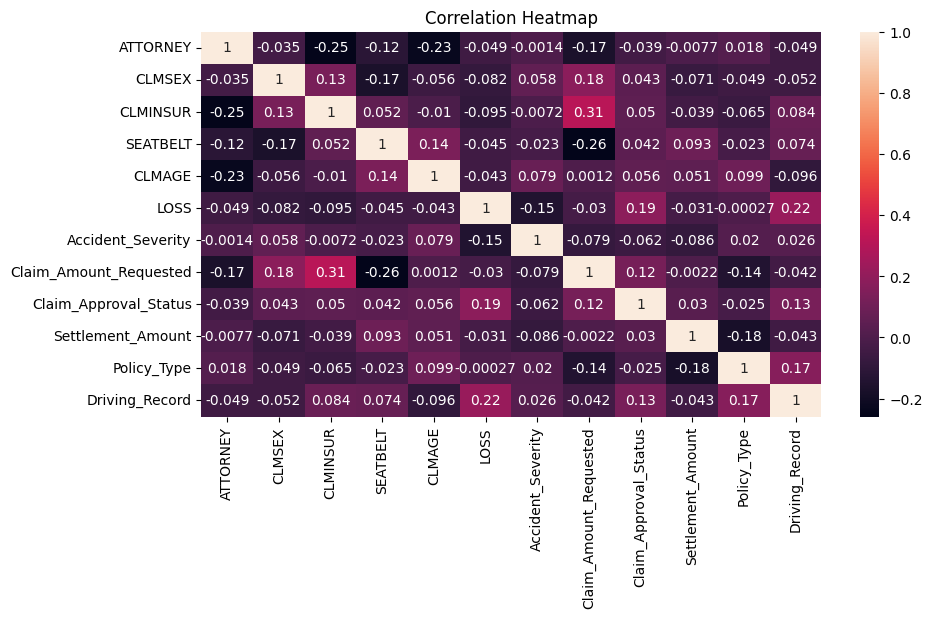

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(insurance.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

Normalizer Scaling

In [ ]:
scaling=Normalizer()
insurance['Claim_Approval_Status']=scaling.fit_transform(insurance[['Claim_Approval_Status']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.531471   
1           0     1.0       0.0       1.0      19  0.139809   
2           1     0.0       0.0       1.0      69  0.994881   
3           1     0.0       0.0       1.0      34  0.583828   
4           1     1.0       1.0       0.0       2  0.023032   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.597283   
358         1     1.0       0.0       1.0      26  0.956065   
365         0     1.0       0.0       1.0      86  0.547839   
367         1     0.0       0.0       0.0      91  0.524251   
594         0     0.0       0.0       1.0      77  0.886426   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.646122                    1.0   
1                    1                0.174888                    1

In [ ]:
scaling=Normalizer()
insurance['LOSS']=scaling.fit_transform(insurance[['LOSS']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE  LOSS  Accident_Severity  \
0           1     1.0       1.0       0.0       0   1.0                  1   
1           0     1.0       0.0       1.0      19   1.0                  1   
2           1     0.0       0.0       1.0      69   1.0                  2   
3           1     0.0       0.0       1.0      34   1.0                  1   
4           1     1.0       1.0       0.0       2   1.0                  2   
..        ...     ...       ...       ...     ...   ...                ...   
326         1     0.0       1.0       1.0      35   1.0                  0   
358         1     1.0       0.0       1.0      26   1.0                  2   
365         0     1.0       0.0       1.0      86   1.0                  1   
367         1     0.0       0.0       0.0      91   1.0                  1   
594         0     0.0       0.0       1.0      77   1.0                  0   

     Claim_Amount_Requested  Clai

StandardScaling

In [ ]:
scaling=StandardScaler()
insurance['LOSS']=scaling.fit_transform(insurance[['LOSS']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.103142   
1           0     1.0       0.0       1.0      19  0.103142   
2           1     0.0       0.0       1.0      69  0.103142   
3           1     0.0       0.0       1.0      34  0.103142   
4           1     1.0       1.0       0.0       2  0.103142   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.103142   
358         1     1.0       0.0       1.0      26  0.103142   
365         0     1.0       0.0       1.0      86  0.103142   
367         1     0.0       0.0       0.0      91  0.103142   
594         0     0.0       0.0       1.0      77  0.103142   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.646122                    1.0   
1                    1                0.174888                    1

In [ ]:
scaling=StandardScaler()
insurance['Claim_Amount_Requested']=scaling.fit_transform(insurance[['Claim_Amount_Requested']])
print("Insurance data after scaling:")
print(insurance)

Insurance data after scaling:
     ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE      LOSS  \
0           1     1.0       1.0       0.0       0  0.103142   
1           0     1.0       0.0       1.0      19  0.103142   
2           1     0.0       0.0       1.0      69  0.103142   
3           1     0.0       0.0       1.0      34  0.103142   
4           1     1.0       1.0       0.0       2  0.103142   
..        ...     ...       ...       ...     ...       ...   
326         1     0.0       1.0       1.0      35  0.103142   
358         1     1.0       0.0       1.0      26  0.103142   
365         0     1.0       0.0       1.0      86  0.103142   
367         1     0.0       0.0       0.0      91  0.103142   
594         0     0.0       0.0       1.0      77  0.103142   

     Accident_Severity  Claim_Amount_Requested  Claim_Approval_Status  \
0                    1                0.630248                    1.0   
1                    1               -1.013358                    1

Exploratory Data Analysis (EDA)

In [ ]:
import statsmodels.formula.api as smf

model=smf.ols('ATTORNEY~Policy_Type',data=insurance).fit()

In [ ]:
model.rsquared,model.rsquared_adj

(np.float64(0.00033862433862374974), np.float64(-0.010410422711498502))

In [ ]:
invovlment_rate=insurance.groupby('Policy_Type')['ATTORNEY'].mean()
print(invovlment_rate)

Policy_Type
0    0.622222
1    0.640000
Name: ATTORNEY, dtype: float64


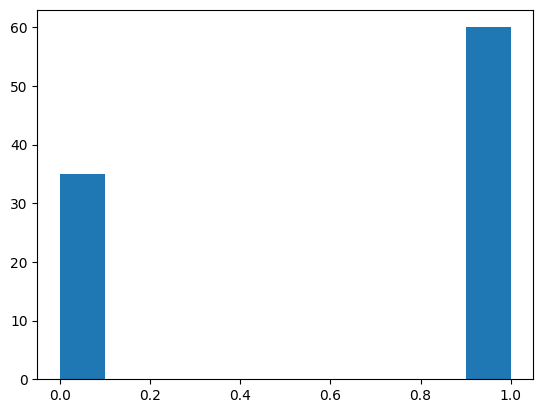

In [ ]:
plt.hist(insurance['ATTORNEY'])
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = insurance[[ 'Accident_Severity','Driving_Record', 'SEATBELT', 'CLMAGE', 'LOSS', 'Claim_Amount_Requested', 'Settlement_Amount']]
y = insurance['ATTORNEY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)




In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7368421052631579
Confusion Matrix:
[[ 3  3]
 [ 2 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.79      0.85      0.81        13

    accuracy                           0.74        19
   macro avg       0.69      0.67      0.68        19
weighted avg       0.73      0.74      0.73        19



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

y = insurance['ATTORNEY']




X = insurance[['CLMAGE', 'LOSS', 'Policy_Type', 'CLMSEX', 'CLMINSUR']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator = LogisticRegression(max_iter=1000)

selector = RFE(estimator, n_features_to_select=3, step=1)

selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

estimator.fit(X_train_selected, y_train)

print("Model Score:", estimator.score(X_test_selected, y_test))

Selected Features: Index(['LOSS', 'Policy_Type', 'CLMINSUR'], dtype='object')
Model Score: 0.631578947368421


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:

X = insurance[['CLMAGE', 'LOSS', 'Policy_Type', 'CLMSEX', 'CLMINSUR','Accident_Severity']]
y = insurance['ATTORNEY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


y_pred = tree_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.6842105263157895


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X = insurance[['CLMAGE', 'LOSS', 'Policy_Type', 'CLMSEX', 'CLMINSUR','Accident_Severity']]
y = insurance['ATTORNEY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

insurance_features = tree_model.feature_importances_
for i,v in enumerate(insurance_features):
	print('Feature: %0d, Score: %.5f' % (i,v))





Feature: 0, Score: 0.61586
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.10223
Feature: 3, Score: 0.10223
Feature: 4, Score: 0.10070
Feature: 5, Score: 0.07899


SVM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
column_names = [['CLMAGE', 'LOSS', 'ATTORNEY', 'CLMSEX', 'CLMINSUR','Accident_Severity']]


x = insurance.drop(['CLMAGE', 'LOSS', 'ATTORNEY', 'CLMSEX', 'Accident_Severity'], axis=1)
y = insurance['Policy_Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svr = SVR()

param_grid = {
    'C': [0.1, 1, 10],  # Changed 'c' to 'C'
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}
grid_search = GridSearchCV( estimator=svr , param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)




In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
grid_search.best_params_, grid_search.best_score_

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix



clf = SVC(C=15, gamma=50)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error') # Use the correct class name
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

XG Boost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x= insurance.iloc[:,0:8]
y = insurance.iloc[:,8]

In [ ]:
speed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=speed)

In [ ]:
model = XGBClassifier()
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [ ]:
params = {}
params['learning_rate'] = 0.003  # Changed from 0.00 to 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_Features'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth']  = 10

In [ ]:
clf = lgb.train(params, d_train, 9)

In [ ]:
y_pred=clf.predict(x_test)
predictions = [round(values) for values in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# Instead of lists, define X and y using the column names from your DataFrame:
X = insurance[['Claim_Amount_Requested', 'Accident_Severity', 'CLMAGE', 'CLMSEX', 'CLMINSUR']]
y = insurance['ATTORNEY']  # Assuming 'attorney_involved' is 1 if attorney was involved, 0 otherwise



# 2. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preprocessing: Feature Engineering and Transformation
# a. Identify numerical and categorical features
numerical_features = ['Claim_Amount_Requested', 'CLMAGE']  # Updated numerical features
categorical_features = ['Accident_Severity', 'CLMSEX', 'CLMINSUR']  # Updated categorical features

# b. Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# c. Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# 5. Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# ... (Further analysis and deployment as needed)

Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       0.89      0.62      0.73        13

    accuracy                           0.68        19
   macro avg       0.69      0.72      0.68        19
weighted avg       0.77      0.68      0.69        19



In [ ]:
import pickle
with open('drag_prediction.pkl','wb') as f:
  pickle.dump(model, f)

print("Model has been saved as ")